## 1) Виведіть перші 8 рядків набору даних

In [444]:
import numpy as np
import pandas as pd

In [445]:
csv_file = 'NationalNames.csv'

df = pd.read_csv(csv_file)

df.loc[0:7]

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


## 2) Вивести останні 8 рядків набору данних

In [446]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


## 4) Отримайте загальну інформацію про дані у наборі даних

In [447]:
columns_included = ['Id', 'Year', 'Count']
summary = df[columns_included].describe(percentiles=[.25, .5, .75])
summary

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


## 5) Знайдіть кількість унікальних імен у наборі даних

In [448]:
unique_names = df['Name'].nunique()
unique_names

93889

## 6) Обчисліть кількість унікальних жіночих та чоловічих імен у наборі даних

In [449]:
mask_f = df['Gender'] == 'F'
mask_m = df['Gender'] == 'M'

women = df.loc[mask_f, 'Name'].nunique()
men = df.loc[mask_m, 'Name'].nunique()

result = pd.DataFrame({'Gender': ['F', 'M'], 'Name': [women, men]})
result

,Gender,Name
0,F,64911
1,M,39199


## 7) Знайдіть 5 найпопулярніших чоловічих імен у 2010 році

In [450]:
men2010_mask = (df['Year'] == 2010) & (df['Gender'] == 'M')
men_names = df[men2010_mask].sort_values(by='Count', ascending=False).head(5)
men_names

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


## 8) Знайдіть найпопулярніше ім'я за результатами одного року (ім'я, для якого Count максимальне)

In [451]:
year = 1947
fq_name = df[df['Year'] == year].sort_values(by='Count', ascending=False)
fq_name.head(1)

,Id,Name,Year,Gender,Count
431052,431053,Linda,1947,F,99680


## 9) Підрахуйте кількість записів, для яких Count мінімальне у наборі

In [452]:
smallest = df.sort_values(by='Count', ascending=True)
smallest_count_value = smallest.iloc[0, 4] # get the smallest Count value

rows = df[df['Count'] == smallest_count_value]
rows.shape[0]

254615

## 10) Підрахуйте кількість унікальних імен у кожному році

In [453]:
counts = df.groupby(by='Year').agg({'Name': pd.Series.nunique})
counts

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


## 11) Знайдіть рік із найбільшою кількістю унікальних імен

In [454]:
counts = df.groupby(by='Year').agg({'Name': pd.Series.nunique})
max_unique_year = counts.sort_values(by='Name', ascending=False).head(1)
max_unique_year

,Name
Year,
2008,32488


## 12) Знайдіть найпопулярніше ім'я в році з найбільшою кількістю унікальних імен (2008) 

In [455]:
year = 2008
fq_name = df[df['Year'] == year].sort_values(by='Count', ascending=False)
fq_name.head(1).iloc[0, 1]

'Jacob'

## 18) Підрахуйте кількість років, коли дівчаток народжувалося більше, ніж хлопчиків.

In [456]:
gender_counts = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
gender_counts
gender_difference = gender_counts[(gender_counts['F'] - gender_counts['M']) > 0]
gender_difference.shape[0]

54

## 19) Накресліть графік загальної кількості народжень хлопчиків та дівчаток на рік 

In [457]:
from matplotlib import pyplot as plt 
%matplotlib inline

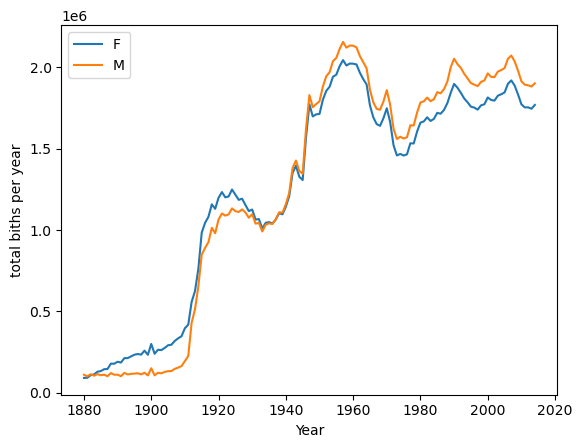

In [458]:
gc = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
plt.plot(gc.index, gc['F'], label='F')
plt.plot(gc.index, gc['M'], label='M')
plt.xlabel('Year')
plt.ylabel('total biths per year')
legend = plt.legend(loc='upper left', frameon=True)


## 20) Підрахуйте кількість гендерно-нейтральних імен (однакових для дівчат та хлопців)

In [459]:
genn = df.groupby(['Name', 'Gender']).size().reset_index(name='Count')
genn = genn[genn.duplicated(subset='Name', keep=False)]
genn.shape[0]/2 # because we have doubled rows in the data frame

10221.0

## 21) Порахуйте, скільки разів хлопчиків називали Barbara

In [460]:
bar = df[(df['Gender'] == 'M') & (df['Name'] == 'Barbara')]
bar['Count'].sum()

4139

## 23) Знайти найпопулярніші гендерно-нейтральні імена (ті, що присутні кожного року) 

In [461]:
name_years = df.groupby(['Name', 'Gender'])['Year'].nunique().reset_index(name='YearsAppeared')
name_years = name_years[name_years.duplicated(subset='Name', keep=False)]

total_years = df['Year'].nunique()
every_year_names = name_years[name_years['YearsAppeared'] == total_years]

every_year_names = every_year_names.reset_index().drop_duplicates(subset='Name', keep='first')
every_year_names

,index,Name,Gender,YearsAppeared
0,250,Aaron,M,135
1,393,Abbie,F,135
2,555,Abel,M,135
3,620,Abigail,F,135
4,690,Abraham,M,135
...,...,...,...,...
825,100086,Wilson,M,135
826,100140,Winifred,F,135
827,100151,Winnie,F,135
828,100294,Wyatt,M,135


## 25) Побудувати графік розподілення кількості імен John та Mary по роках без залежності від статі

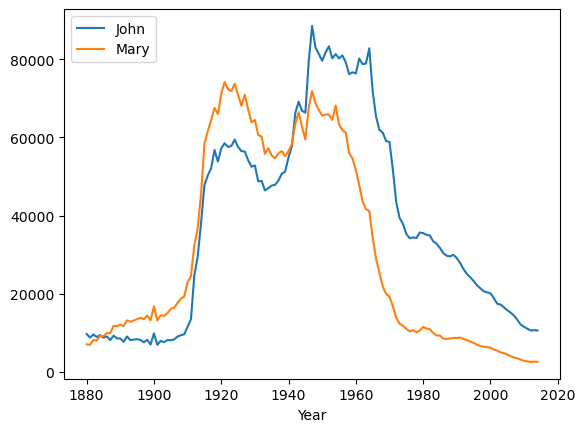

In [462]:
mary = df[df['Name'] == 'Mary']
john = df[df['Name'] == 'John']

mary_count = mary.groupby(['Year'])['Count'].sum()
john_count = john.groupby(['Year'])['Count'].sum()

plt.plot(john_count.index, john_count, label='John')
plt.plot(mary_count.index, mary_count, label='Mary')

plt.xlabel('Year')
plt.ylabel('')
legend = plt.legend(loc='upper left', frameon=True)

## 27) Знайти найпопулярніші імена в кожному році

In [463]:
# Group by 'Year' and 'Name', and sum the 'Count' for each group
byYear = df.groupby(['Year', 'Name'])['Count'].sum().reset_index()

# Find the most popular name for each year
most_popular = byYear.loc[byYear.groupby('Year')['Count'].idxmax()]

# Display the result
most_popular

,Year,Name,Count
955,1880,John,9701
2818,1881,John,8795
4735,1882,John,9597
6727,1883,John,8934
8775,1884,John,9428
...,...,...,...
1521288,2010,Isabella,22913
1568092,2011,Sophia,21839
1599369,2012,Sophia,22285
1630271,2013,Sophia,21172
